### Name- K S Deepthi Priya
#### The Spark Foundation
#### Topic : Data Science& Business Analytics

##### TASK 1: Predict the percentage of an student based on the no. of study hours.

In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from IPython.core.interactiveshell import InteractiveShell
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
# from collections import defaultdicta
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

### READ DATA

In [2]:
# Importing data
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

### DATA UNDERSTANDING

In [3]:
# Check the head of the dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Chcek the descriptive information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Check the shape of df

df.shape

(25, 2)

In [6]:
#Check dtype 
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:
#Change column dtype of Score to float64
df['Scores']=pd. to_numeric(df['Scores'], downcast="float")

In [8]:
#Check dtype after conversion
df.dtypes

Hours     float64
Scores    float32
dtype: object

In [9]:
#Check the descriptive  statistics

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286888
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


We can see from above that there are 25 student records and avg hours spent is 5hrs and avg marks is 51.There are no outliers that is hours lie with 1-9 and marks lie within 17-95

### DATA QUALITY CHECK
#### Check for NULL/MISSING values

In [10]:
# percentage of missing values in each column
round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

Scores    0.0
Hours     0.0
dtype: float64

In [11]:
# row-wise null count percentage
round((df.isnull().sum(axis=1)/122)*100,2).sort_values(ascending=False)

24    0.0
11    0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
12    0.0
23    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
0     0.0
dtype: float64

- There are NO MISSING/NULL values either in columns or rows.

# EXPLORATORY DATA ANALYSIS

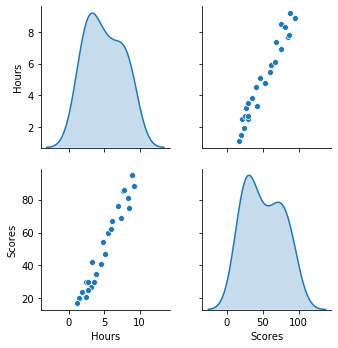

In [12]:
#Plotting the distribution of scores
sns.pairplot(df, diag_kind='kde')
plt.show()

- The above Pair-Plot tells us that there is a LINEAR RELATION

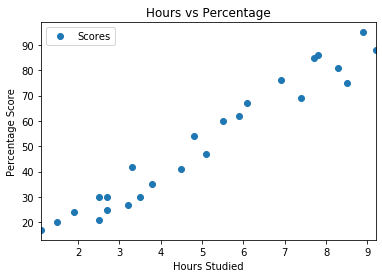

In [13]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

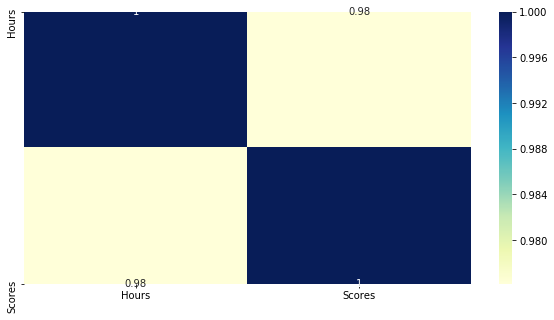

In [14]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here im considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [15]:
## spliiting into X and y 
X=df['Hours']
y=df['Scores']

In [16]:
## spliiting into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [17]:
y_train.shape,X_train.shape,X_test.shape,y_test.shape

((17,), (17,), (8,), (8,))

In [18]:
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)

## Model building using sklearn

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr=LinearRegression()

In [21]:
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
##coefficient and intercept
print(lr.coef_)
print(lr.intercept_)

[9.71054094]
2.794196676599803


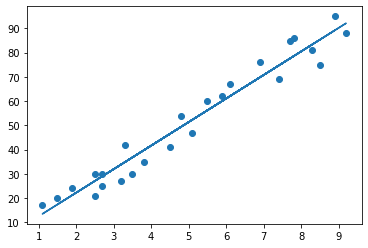

In [23]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [24]:
## making predictions on trian set
y_train_pred=lr.predict(X_train)


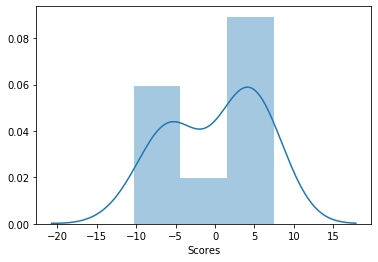

In [25]:
## error rate should be normally distributed--->> linear regression assumption
res=y_train-y_train_pred
sns.distplot(res)

In [27]:
## evaluating
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [28]:
#evaluating on train_set
print('r2_score',r2_score(y_train,y_train_pred))
print('mean_absolute_error',mean_absolute_error(y_train,y_train_pred))
print('root mean squared error',np.sqrt(mean_squared_error(y_train,y_train_pred)))

r2_score 0.9536486505905261
mean_absolute_error 5.1708315630914194
root mean squared error 5.603419312826166


In [29]:
##making predictions on test_set
y_test_pred=lr.predict(X_test)

In [30]:
#evaluating on test_set
print('r2_score',r2_score(y_test,y_test_pred))
print('mean_absolute_error',mean_absolute_error(y_test,y_test_pred))
print('root mean square error',np.sqrt(mean_squared_error(y_test,y_test_pred)))

r2_score 0.9487647340257012
mean_absolute_error 4.499999999999998
root mean square error 4.859985351228103


## Adjusted R^2 Value for TEST
- Formula for Adjusted R^2

R2adj.=1−(1−R2)∗n−1/n−p−1

In [33]:
# We already have the value of R^2 (calculated in above step)

r2=0.9487647340257012

In [34]:
# Get the shape of X_test

X_test.shape

(8, 1)

In [35]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.9402255230299847

### predicted score if a student studies for 9.25 hrs/ day?

In [36]:
# You can also test with your own data
hours = 9.25
own_pred = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.61670033840096


## CONCLUSION

In [37]:
## comparing actual and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})  
df

,Actual,Predicted
8,81.0,83.391686
16,30.0,27.070549
0,21.0,27.070549
23,76.0,69.796929
11,62.0,60.086388
9,25.0,29.012657
13,42.0,34.838982
1,47.0,52.317955


The Score if students studied for 9.25 hrs/day is 92.61